In [44]:

'''
Library Importation
'''

# standard libraries
import math
import time

# nonstandard library import
import numpy as np
from scipy.misc import comb
from scipy.special import factorial
import matplotlib.pyplot as plt

print 'Finished!'



Finished!


In [51]:

'''
Factory Methods
'''

# Mean of PDF
def mean_pdf(x,y):
    return sum([i*j for i,j in zip(x,y)])

# Variance of PDF
def var_pdf(x,y):
    avg = mean_pdf(x,y)
    return sum([((i-avg)**2)*j for i,j in zip(x,y)])

# N choose K
def nCk(n, r):
    return comb(n,r)

# Beta Function
def beta(x,y):
    #return math.gamma(x)*math.gamma(y)/math.gamma(x + y)
    return math.exp(math.lgamma(x) + math.lgamma(y) - math.lgamma(x+y))

# Beta function parameters from mean and variance
def beta_parameters(error,samples):
    return (1.-error)*samples,error*samples

# Stirling number generator (2nd kind)
def stirling(n,k,memory={}):
    if not (n,k) in memory.keys(): 
        n1=n
        k1=k
        if n<=0:
            return 1
        elif k<=0:
            memory[(n,k)] = 0
        elif (n==0 and k==0):
            memory[(n,k)] = -1
        elif n!=0 and n==k:
            memory[(n,k)] = 1
        elif n<k:
            memory[(n,k)] = 0
        else:
            temp1=stirling(n1-1,k1)
            temp1=k1*temp1
            memory[(n,k)] = (k1*(stirling(n1-1,k1)))+stirling(n1-1,k1-1)
    return memory[(n,k)]


'''
Howie Equations
'''

def eq2(c,f,C):
    return nCk(C,c)*(f**c)*((1-f)**(C-c))

def eq3(cx,c,s1,s2):
    return (nCk(c,cx)*beta(cx+s1,c-cx+s2)/beta(s1,s2))

def eq4(w,c,W):
    return factorial(W)*stirling(c,w)/(factorial(W-w)*(W**c))

def eq6(w_ab,w_a,w_b,w):
    return (nCk(w,w_ab)*nCk(w-w_ab,w_a-w_ab)*nCk(w-w_a,w_b-w_ab))/(nCk(w,w_a)*nCk(w,w_b))


def pairseq(w_ab,w_a,w_b,f,C,W,s1,s2,threshold = 1e-3,silent=True):
    p_total = 0. # prep a summing variable
    
    for c_i in xrange(0,C + 1):
        
        # Check on the status of w_i
        if c_i < max(w_ab,w_a,w_b): 
            if not silent: print 'Pre-P1 exit'
            continue
        
        if not silent: print 'Identifying match probability... {}%\r'.format(100*(c_i+1)/C),

        p1 = eq2(c_i,f,C)
        
        # Check on the status of p1
        if p1 < threshold: 
            if not silent: print 'P1 exit'
            continue # condition for early exit (apply to p)
            
        for w_i in xrange(0,1 + min([c_i,W])):
                        
            # Check on the status of w_i
            if w_i < max(w_a,w_b):            
                if not silent: print 'Pre-P2 exit'
                continue
                
            p2 = eq4(w_i,c_i,W)
   
            
            # Check on the status of p2
            if p1*p2 < threshold: 
                if not silent: print 'P2 exit'
                continue # condition for early exit (apply to p_term)
            
            for c_ia in xrange(0,c_i + 1):
                
                # Check on the status of c_ia
                if c_ia < w_a: 
                    if not silent: print 'Pre-P3 exit'
                    continue # you need atleast c cells to find a in w_a wells
                    
                p3 = eq3(c_ia,c_i,s1,s2)
                    
                # Check on the value of p3
                if p1*p2*p3 < threshold: 
                    if not silent: print 'P3 exit'
                    continue # condition for early exit (apply to p_term)
                
                for c_ib in xrange(0,c_i + 1):
                    
                    # Check on the status of c_ib
                    if c_ib < w_b: 
                        if not silent: print 'Pre-P4 exit'
                        continue # you need atleast c cells to find b in w_b wells
                    
                    p4 = eq3(c_ib,c_i,s1,s2)

                    # Check on the status of p4
                    if p1*p2*p3*p4 < threshold:
                        if not silent: print 'P4 exit'
                        continue # condition for early exit (apply to p_term)
                    
                    # Normally we would integrate across all values w_a,w_b,w_ab
                    p5 = eq4(w_a,c_ia,W)
                    p6 = eq4(w_b,c_ib,W)

                    
                    if p1*p2*p3*p4*p5*p6 < threshold:
                        if not silent: print 'P5/6 exit'
                        continue
                    
                    p7 = eq6(w_ab,w_a,w_b,w_i)
                    p8 = 1
                    
                    if all([p5,p6,p7,p8]):
                        p_total += p1*p2*p3*p4*p5*p6*p7*p8

    
    print ''
    return p_total,timer

print 'Finished!'
        

Finished!


In [53]:
#'''

error,samples = 0.1,1000
s1,s2 = beta_parameters(error,samples)
p,timer = pairseq(12,13,13,0.05,500,50,s1,s2,threshold=1e-6)


#'''

'''
w_a,w_b,w = 25,10,25

total = 0
for w_ab in xrange(max(0,w_a+w_b-w),min(w_a,w_b)+1):
    print 'Parameters:',w_ab,w_a,w_b,w
    print 'Eq6:',eq6(w_ab,w_a,w_b,w)
    total += eq6(w_ab,w_a,w_b,w)
    print 'Subtotal:',total
    
print 'Total:',total
#'''

#'''

# likely conclusions... s1,s2 define mean reduction
# Reduction = s1/(s1+s2)
# We should just choose beta parameters reflective of the binomial

print 'Total probability:',p
print 'Finished!'


Identifying match probability... 100%
Total probability: 0.00149251125843
Finished!


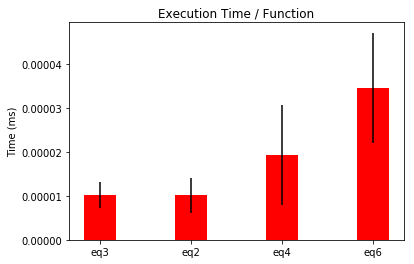

In [22]:
avg,std = [np.mean(values) for values in timer.values()],[np.std(values) for values in timer.values()]

ind = np.arange(len(avg))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, avg, width, color='r', yerr=std)

ax.set_ylabel('Time (ms)')
ax.set_title('Execution Time / Function')
ax.set_xticks(ind)
ax.set_xticklabels(timer.keys())   

plt.show()
    

6
8
6
